# Doc2vec,Tsne,SpotifySongs,Sub-Genres,Langauges : Word embeddings (Document Embedding)

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('final_spotify_songs.csv')


# Erase Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [3]:
df = df[['playlist_subgenre','lyrics','language']]

df.head(10)

playlist_subgenre                                             lyrics  \
0        classic rock  Minsan pa Nang ako'y napalingon Hindi ko alam ...   
1           hard rock  The trees, are singing in the wind The sky blu...   
2      new jack swing  NA Yeah, Spyderman and Freeze in full effect U...   
3            neo soul  I really can't stay Baby it's cold outside I'v...   
4           dance pop  Get up out of my business You don't keep me fr...   
5  urban contemporary  Hold your breath, don't look down, keep trying...   
6      new jack swing  All I want is somebody who's gonna love me for...   
7      new jack swing  Feels good Everybody Tender lover Tender love ...   
8            big room  Don't run away, it's getting colder Our hearts...   
9             hip pop  Ho una cosa da dirti da tempo Ma  non ho mai t...   

  language  
0       tl  
1       en  
2       en  
3       en  
4       en  
5       en  
6       en  
7       en  
8       en  
9       it

In [4]:
df["new_column"] = df['playlist_subgenre'].astype(str) +"-"+ df["lyrics"]+"-"+ df["language"]
print(df)

               playlist_subgenre  \
0                   classic rock   
1                      hard rock   
2                 new jack swing   
3                       neo soul   
4                      dance pop   
...                          ...   
18449  progressive electro house   
18450                 electropop   
18451                   neo soul   
18452             new jack swing   
18453               classic rock   

                                                  lyrics language  \
0      Minsan pa Nang ako'y napalingon Hindi ko alam ...       tl   
1      The trees, are singing in the wind The sky blu...       en   
2      NA Yeah, Spyderman and Freeze in full effect U...       en   
3      I really can't stay Baby it's cold outside I'v...       en   
4      Get up out of my business You don't keep me fr...       en   
...                                                  ...      ...   
18449  Caught up in such a head rush, wide-eyed latel...       en   
18450  My anaco

In [5]:
df['playlist_subgenre'].unique()

array(['classic rock', 'hard rock', 'new jack swing', 'neo soul',
       'dance pop', 'urban contemporary', 'big room', 'hip pop',
       'latin pop', 'indie poptimism', 'gangster rap', 'album rock',
       'post-teen pop', 'trap', 'latin hip hop', 'southern hip hop',
       'tropical', 'electropop', 'progressive electro house', 'pop edm',
       'reggaeton', 'hip hop', 'permanent wave', 'electro house'],
      dtype=object)

In [6]:
len(['classic rock', 'hard rock', 'new jack swing', 'neo soul',
       'dance pop', 'urban contemporary', 'big room', 'hip pop',
       'latin pop', 'indie poptimism', 'gangster rap', 'album rock',
       'post-teen pop', 'trap', 'latin hip hop', 'southern hip hop',
       'tropical', 'electropop', 'progressive electro house', 'pop edm',
       'reggaeton', 'hip hop', 'permanent wave', 'electro house'])

24

In [7]:
df["lyrics"]=df["new_column"]

In [8]:
df["lyrics"][0]

"classic rock-Minsan pa Nang ako'y napalingon Hindi ko alam Na ika'y tutugon Sa mga tanong na aking nabitawan Hindi ko alam kung ito'y totoo Pangarap ka Sa bawat sandali Langit man ang tingin ko Sayo sana'y marating Hanggang dito na lang yata Ang kaya kong gawin Mangarap na lang At bumulong sa hangin Kailan kaya Darating ulit ang isang Sandali Na ako'y lilingon muli Pangarap ka o tinig mong kay lamig Ang iyong mga ngiti na sa akin ay Nakapagbigay pansin (Ikaw ba ay isang pangarap lang) Pangarap ka o tinig mong kay lamig Ang iyong mga ngiti Na sa akin ay Nakapagbigay... Pangarap ka o tinig mong kay lamig Ang iyong mga ngiti Na sa akin ay Nakapagbigay Pangarap ka o tinig mong kay lamig Ang iyong mga ngiti Na sa akin ay Nakapagbigay pansin-tl"

In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

playlist_subgenre    0
lyrics               0
language             0
new_column           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18194 entries, 0 to 18453
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   playlist_subgenre  18194 non-null  object
 1   lyrics             18194 non-null  object
 2   language           18194 non-null  object
 3   new_column         18194 non-null  object
dtypes: object(4)
memory usage: 710.7+ KB


In [12]:
df.shape

(18194, 4)

In [13]:
df.index = range(18194)
df['lyrics'].apply(lambda x: len(x.split(' '))).sum()

7767775

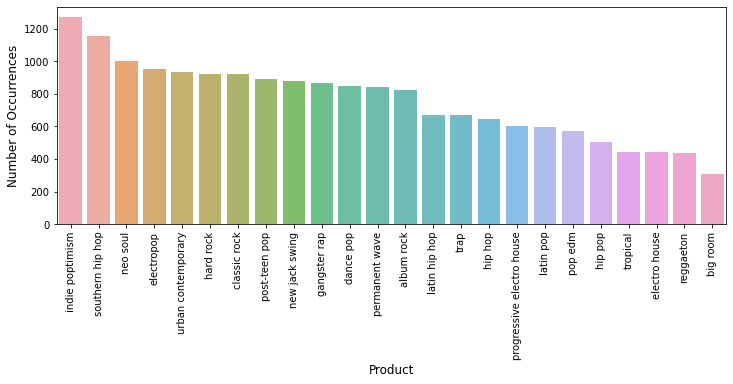

In [14]:
cnt_pro = df['playlist_subgenre'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [15]:
def print_complaint(index):
    example = df[df.index == index][['lyrics', 'playlist_subgenre']].values[0]
    if len(example) > 0:
        print(example[0])
        print('playlist_genre:', example[1])
print_complaint(12)

latin pop-Ihhh-yo! Ihhh-ye! Sonó la campana y el fin de semana se deja ver (Sha-la-la, la-la-la) Vestido, de traje, lujuria salvaje bajo mi piel Si Dios puso la manzana fue para morder Ay, Dios! Pequemo' abrazaditos hasta el amanecer Llego la fiesta, pa' tu boquita Toda la noche, todito el día Vamo' a bañarnos en la orillita Que la marea está pica'ita-ita-ita Una mordidita, una mordidita Una mordidita, de tu boquita Una mordidita, una mordidita Una mordidita, de tu boquita Tus labios, mis dientes Bocado crujiente, rico pastel Fuego en tus pupilas, tu cuerpo destila tequila y miel Si Dios puso la manzana fue para morder Ay, Dios! Pequemo' abrazaditos hasta el amanecer Llego la fiesta, pa' tu boquita Toda la noche, todito el día Vamo' a bañarnos en la orillita Que la marea está pica'ita-ita-ita Una mordidita, una mordidita Una mordidita, de tu boquita Una mordidita, una mordidita Una mordidita, de tu boquita Quiero pensar, que no eres real Me parece natural, letal, así te pones a bailar 

In [16]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['lyrics'] = df['lyrics'].apply(cleanText)

In [17]:
#append new column with subgeners clusers

In [22]:
data23= df
import nltk
from nltk.corpus import stopwords

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens


data23_tagged = data23.apply(lambda r: TaggedDocument(words=tokenize_text(r['lyrics']), tags=[r.playlist_subgenre]), axis=1)


In [23]:
import multiprocessing
cores = multiprocessing.cpu_count()
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(data23_tagged.values)])

100%|████████████████████████████████████████████████████████████████████████| 18194/18194 [00:00<00:00, 829216.84it/s]


In [24]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(data23_tagged.values)]), total_examples=len(data23_tagged.values), epochs=10)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|████████████████████████████████████████████████████████████████████████| 18194/18194 [00:00<00:00, 829225.85it/s]


CPU times: total: 2h 16min 32s
Wall time: 54min 3s


In [25]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors

#target-output
#regressor-ip,and pushing,vector is stored

In [26]:
y_train1, X_train1 = vec_for_learning(model_dbow,data23_tagged)


In [27]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 6,init='k-means++')
model.fit(X_train1)

KMeans(n_clusters=6)

In [29]:
labels = model.labels_
old_dataset=pd.read_csv("./final_spotify_songs.csv")
old_dataset=old_dataset.dropna()
old_dataset["cluster_label"]=labels
old_dataset.to_csv("dataset_cluster_label_updated_for_subgener.csv")

In [30]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['lyrics']), tags=[r.playlist_subgenre]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['lyrics']), tags=[r.playlist_subgenre]), axis=1)

In [31]:
train_tagged.values[30]

TaggedDocument(words=['hip', 'pop-portami', 'sentire', 'le', 'onde', 'del', 'mare', 'portami', 'vicino', 'le', 'cose', 'lontane', 'portami', 'dovunque', 'basta', 'che', 'ci', 'sia', 'posto', 'per', 'una', 'birra', 'qualche', 'vecchio', 'rimpianto', 'portami', 'sentire', 'il', 'rumore', 'del', 'vento', 'che', 'tanto', 'torneresti', 'in', 'qualsiasi', 'momento', 'portami', 'dovunque', 'basta', 'che', 'ci', 'sia', 'posto', 'per', 'un', 'sorriso', 'qualche', 'vecchio', 'rimpianto', 'dove', 'vuoi', 'non', 'dove', 'sai', 'dove', 'esisti', 'non', 'ci', 'sei', 'portami', 'con', 'te', 'portami', 'con', 'te', 'dove', 'tutto', 'si', 'trasforma', 'dove', 'il', 'mondo', 'non', 'mi', 'tocca', 'portami', 'con', 'te', 'portami', 'con', 'te', 'dov', 'leggero', 'il', 'mio', 'bagaglio', 'dove', 'mi', 'ami', 'anche', 'se', 'sbaglio', 'dove', 'vola', 'si', 'ribella', 'ogni', 'rondine', 'al', 'guinzaglio', 'portami', 'al', 'sicuro', 'ma', 'senza', 'parlare', 'lascia', 'che', 'lo', 'faccia', 'il', 'tuo', 'mo

In [32]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [33]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|████████████████████████████████████████████████████████████████████████| 12735/12735 [00:00<00:00, 245558.89it/s]


In [34]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|████████████████████████████████████████████████████████████████████████| 12735/12735 [00:00<00:00, 798040.72it/s]


CPU times: total: 11min 10s
Wall time: 7min 4s


In [35]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors

In [36]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)


In [37]:
X_train[0]

array([ 0.23073451, -0.06069513,  0.69259346, -0.63173616,  0.00166162,
       -0.2967968 ,  0.10704109,  0.46337765,  0.23126128, -0.35867858,
        0.26514137,  0.21629664, -0.31801   , -0.07029688,  0.18587139,
       -0.41957256,  0.25337082,  0.26783523,  0.00556108, -0.03617793,
       -0.33835748,  0.4526423 ,  0.39595205, -0.43220043,  0.33681133,
       -0.13377993, -0.04838276, -0.3622626 , -0.05532829,  0.5720613 ,
       -0.26178867, -0.10799477,  0.06686205, -0.25416437, -0.5383678 ,
        0.00931224, -0.5200407 , -0.34182766, -0.15395048, -0.46877724,
        0.22215934,  0.11564048,  0.75879335,  0.30094025, -0.07822525,
        0.14789177, -0.25004447, -0.10446143, -0.33795062, -0.8065677 ,
        0.73465776,  0.01369574, -0.53008366,  0.15963914,  0.24038638,
       -0.15905428,  0.03635155,  0.38047618,  0.0163544 , -0.31404608,
        0.29981992, -0.59653187, -0.4562264 , -0.49539632, -0.35562164,
        0.2674215 , -0.12142988,  0.2646576 , -0.08541868,  0.09

In [38]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 6,init='k-means++',random_state=49)
model.fit(X_train)

KMeans(n_clusters=6, random_state=49)

In [39]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [40]:
cluster_center

array([[ 0.01036871, -0.32251423,  0.67428965, ..., -0.15439142,
         0.38834828, -0.11225274],
       [ 0.23105957,  0.06953774,  0.86087096, ...,  0.00192926,
         0.22435304, -0.18964741],
       [ 0.06459527, -0.01753018,  0.16702572, ..., -0.00887193,
         0.0252572 , -0.04307349],
       [ 0.02963676, -0.1950776 ,  0.65665989, ..., -0.13885695,
         0.37399079, -0.11129438],
       [ 0.33705125,  0.04702288,  0.95822144, ...,  0.10062941,
         0.10398453, -0.17018157],
       [ 0.12768846, -0.11962859,  0.56140152, ..., -0.07205046,
         0.20725597, -0.11449671]])

In [41]:
labels

array([5, 0, 0, ..., 0, 3, 3])

In [42]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(X_train, labels, metric='euclidean')

In [43]:
silhouette_score

0.19830494

In [44]:
import numpy as np

In [45]:
data_point=cluster_center[1]

In [46]:
cluster_center[1]

array([ 0.23105957,  0.06953774,  0.86087096, -0.69681213, -0.14004369,
       -0.36928957, -0.14119293,  0.56038311,  0.34539227, -0.45733953,
        0.27872075,  0.14705304, -0.62635203, -0.11145822,  0.28727807,
       -0.72823806,  0.27632508,  0.30993868, -0.12359788,  0.12872685,
       -0.4371781 ,  0.53005802,  0.46132668, -0.62824723,  0.6699714 ,
       -0.18288244, -0.19588359, -0.57487962, -0.16551764,  0.65360433,
       -0.1370199 , -0.11899905,  0.18859977, -0.33660902, -0.79343437,
        0.12909117, -0.91223833, -0.32727355, -0.1598416 , -0.67489635,
        0.45954567,  0.22886423,  0.97051419,  0.18970565,  0.01358657,
        0.30074317, -0.40502967, -0.03411251, -0.5273222 , -1.08519049,
        0.95148876, -0.03686653, -0.50790052,  0.30812084,  0.27856409,
       -0.22371068, -0.13662487,  0.57958905, -0.05731883, -0.41830007,
        0.33307552, -0.74301465, -0.6344895 , -0.64662618, -0.39135352,
        0.46366102, -0.20761672,  0.17870859, -0.05935023,  0.04

In [47]:
centroid=cluster_center[2]

In [48]:
distance = np.sqrt(np.sum((data_point - centroid)**2))

In [49]:
distance

7.030553947568834

In [50]:
data_point=cluster_center[2]
centroid=X_train[4]
distance = np.sqrt(np.sum((data_point - centroid)**2))
distance

5.709365055760407

In [51]:
cluster_center[1]

array([ 0.23105957,  0.06953774,  0.86087096, -0.69681213, -0.14004369,
       -0.36928957, -0.14119293,  0.56038311,  0.34539227, -0.45733953,
        0.27872075,  0.14705304, -0.62635203, -0.11145822,  0.28727807,
       -0.72823806,  0.27632508,  0.30993868, -0.12359788,  0.12872685,
       -0.4371781 ,  0.53005802,  0.46132668, -0.62824723,  0.6699714 ,
       -0.18288244, -0.19588359, -0.57487962, -0.16551764,  0.65360433,
       -0.1370199 , -0.11899905,  0.18859977, -0.33660902, -0.79343437,
        0.12909117, -0.91223833, -0.32727355, -0.1598416 , -0.67489635,
        0.45954567,  0.22886423,  0.97051419,  0.18970565,  0.01358657,
        0.30074317, -0.40502967, -0.03411251, -0.5273222 , -1.08519049,
        0.95148876, -0.03686653, -0.50790052,  0.30812084,  0.27856409,
       -0.22371068, -0.13662487,  0.57958905, -0.05731883, -0.41830007,
        0.33307552, -0.74301465, -0.6344895 , -0.64662618, -0.39135352,
        0.46366102, -0.20761672,  0.17870859, -0.05935023,  0.04

In [52]:
X_train[0]

array([ 0.23073451, -0.06069513,  0.69259346, -0.63173616,  0.00166162,
       -0.2967968 ,  0.10704109,  0.46337765,  0.23126128, -0.35867858,
        0.26514137,  0.21629664, -0.31801   , -0.07029688,  0.18587139,
       -0.41957256,  0.25337082,  0.26783523,  0.00556108, -0.03617793,
       -0.33835748,  0.4526423 ,  0.39595205, -0.43220043,  0.33681133,
       -0.13377993, -0.04838276, -0.3622626 , -0.05532829,  0.5720613 ,
       -0.26178867, -0.10799477,  0.06686205, -0.25416437, -0.5383678 ,
        0.00931224, -0.5200407 , -0.34182766, -0.15395048, -0.46877724,
        0.22215934,  0.11564048,  0.75879335,  0.30094025, -0.07822525,
        0.14789177, -0.25004447, -0.10446143, -0.33795062, -0.8065677 ,
        0.73465776,  0.01369574, -0.53008366,  0.15963914,  0.24038638,
       -0.15905428,  0.03635155,  0.38047618,  0.0163544 , -0.31404608,
        0.29981992, -0.59653187, -0.4562264 , -0.49539632, -0.35562164,
        0.2674215 , -0.12142988,  0.2646576 , -0.08541868,  0.09

In [53]:
x1=list(X_train)

In [54]:
plot_list1=[]

In [55]:
cluster_center

array([[ 0.01036871, -0.32251423,  0.67428965, ..., -0.15439142,
         0.38834828, -0.11225274],
       [ 0.23105957,  0.06953774,  0.86087096, ...,  0.00192926,
         0.22435304, -0.18964741],
       [ 0.06459527, -0.01753018,  0.16702572, ..., -0.00887193,
         0.0252572 , -0.04307349],
       [ 0.02963676, -0.1950776 ,  0.65665989, ..., -0.13885695,
         0.37399079, -0.11129438],
       [ 0.33705125,  0.04702288,  0.95822144, ...,  0.10062941,
         0.10398453, -0.17018157],
       [ 0.12768846, -0.11962859,  0.56140152, ..., -0.07205046,
         0.20725597, -0.11449671]])

In [56]:
plot_list3=[]
for pp in range(len(cluster_center)):
    
    plot_list3.append(x1[pp][0])
    
    
plot_list4=[]
for pp in range(len(cluster_center)):
    
    plot_list4.append(x1[pp][1])
    

In [57]:
plot_list1=[]
for pp in range(len(x1)):
    
    plot_list1.append(x1[pp][0])
    

In [58]:
plot_list2=[]
for pp in range(len(x1)):
    
    plot_list2.append(x1[pp][1])
    

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

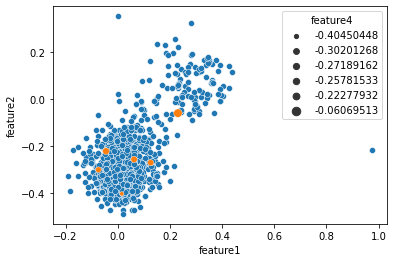

In [59]:
# inputs
feature1 = plot_list1[0:1000]
feature2= plot_list2[0:1000]
feature3= plot_list3
feature4= plot_list4
# convert to pandas dataframe
d = {'feature1': feature1, 'feature2': feature2}
pdnumsqr = pd.DataFrame(d)


d1 = {'feature3': feature3,'feature4': feature4}
pdnumsqr1 = pd.DataFrame(d1)
# plot using lineplot
#sns.set(style='darkgrid')
#sns.lineplot(x='num', y='sqr', data=pdnumsqr)

sns.scatterplot(x='feature1', y='feature2', data=pdnumsqr)
sns.scatterplot(x='feature3', y='feature4', data=pdnumsqr1, size="feature4")

In [ ]:
#second way of applying k-means clustering but before that we try to see how many clusters will best fit our purpose

Text(0, 0.5, 'Inertia')

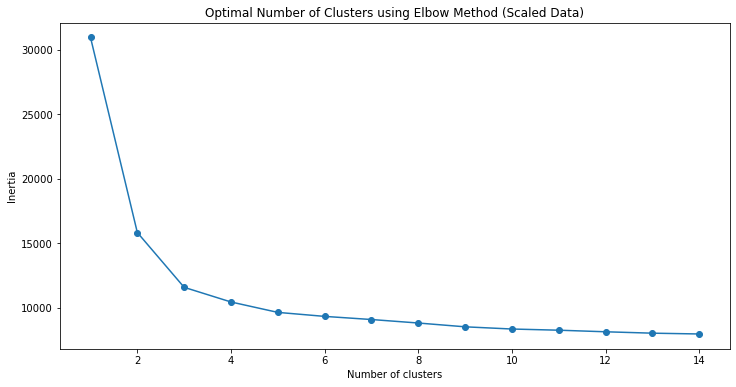

In [60]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(X_train)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [61]:
df_scale2 = X_train
kmeans_scale = KMeans(n_clusters=6, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale2)
#print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale2, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

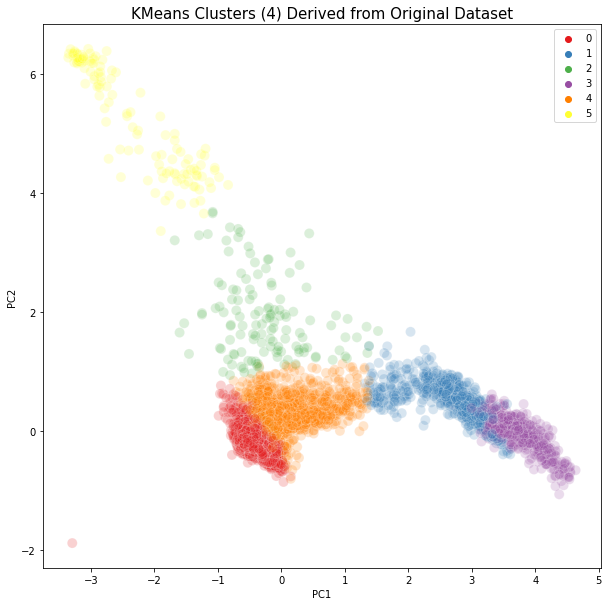

In [63]:
pca2 = PCA(n_components=3).fit(X_train)
pca2d = pca2.transform(X_train)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)

plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px

In [65]:
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
labels = labels_scale
trace = go.Scatter3d(x=pca2d[:,0], y=pca2d[:,1], z=pca2d[:,2], mode='markers',marker=dict(color = labels, colorscale='magma', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
#applying on given lyrics and sub gener and plot the centroides and distances

In [66]:
labels = kmeans_scale.labels_
cluster_center=kmeans_scale.cluster_centers_

In [67]:
labels

array([2, 0, 0, ..., 0, 4, 4])

In [68]:
cluster_center

array([[ 0.01036871, -0.32251423,  0.67428965, ..., -0.15439142,
         0.38834828, -0.11225274],
       [ 0.23105957,  0.06953774,  0.86087096, ...,  0.00192926,
         0.22435304, -0.18964741],
       [ 0.12768846, -0.11962859,  0.56140152, ..., -0.07205046,
         0.20725597, -0.11449671],
       [ 0.33705125,  0.04702288,  0.95822144, ...,  0.10062941,
         0.10398453, -0.17018157],
       [ 0.02963676, -0.1950776 ,  0.65665989, ..., -0.13885695,
         0.37399079, -0.11129438],
       [ 0.06459527, -0.01753018,  0.16702572, ..., -0.00887193,
         0.0252572 , -0.04307349]])

In [69]:
pca2 = PCA(n_components=3).fit(cluster_center)
pca2d = pca2.transform(cluster_center)


In [70]:
pca2d 

array([[-0.25478382,  1.76549891, -0.16464233],
       [-2.13555213, -0.80163442,  0.62800247],
       [ 1.02080225,  0.08629365, -0.12529854],
       [-3.17797267, -1.21820532, -0.48895117],
       [-0.31401539,  1.16675591,  0.16623155],
       [ 4.86152177, -0.99870873, -0.01534197]])

In [71]:
pca2d[:,0]

array([-0.25478382, -2.13555213,  1.02080225, -3.17797267, -0.31401539,
        4.86152177])

In [72]:
pca2d[:,1]

array([ 1.76549891, -0.80163442,  0.08629365, -1.21820532,  1.16675591,
       -0.99870873])

In [73]:
x1=[-0.24827018,  1.93369274,  0.09927498, -3.54708215, -3.2595292 ,
        5.0219138 ]

In [74]:
y1=[-0.18343355, -0.29577815, -0.17285663, -3.57870242,  4.03274577,
        0.19802499]

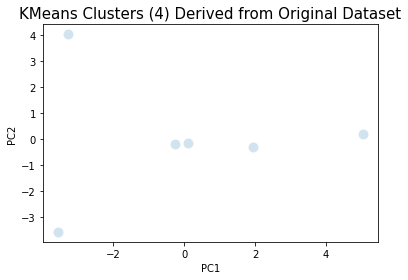

In [75]:
#plt.figure(figsize = (10,10))
sns.scatterplot(x1, y1 ,
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [76]:
pca21 = PCA(n_components=3).fit(X_train)
pca21d = pca21.transform(X_train)

In [77]:
pca21d

array([[ 1.04250815,  1.88342176, -0.48768381],
       [-0.46308381, -0.19598521, -0.09973383],
       [-0.51650034, -0.22039433, -0.00634418],
       ...,
       [-0.52892235, -0.1952891 , -0.07258633],
       [-0.18018999,  0.32120627, -0.20105583],
       [-0.05364846,  0.1733268 ,  0.28652881]])

In [78]:
x2=[ 1.51313243e+00]
y2=[ 4.46942163e-04]

In [79]:
label=['classic rock', 'hard rock', 'new jack swing', 'neo soul',
       'dance pop', 'urban contemporary']

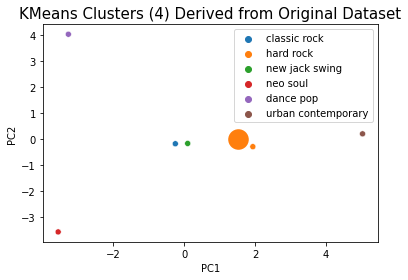

In [80]:
#plt.figure(figsize = (10,10))
sns.scatterplot(x1, y1,hue=label).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)
sns.scatterplot(x2, y2,s=500)

plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [81]:
#the big point above is the location of the lyric that we selected from training input

In [ ]:
#other points are center points of clusters

In [ ]:
#using plotly we can analyse it better

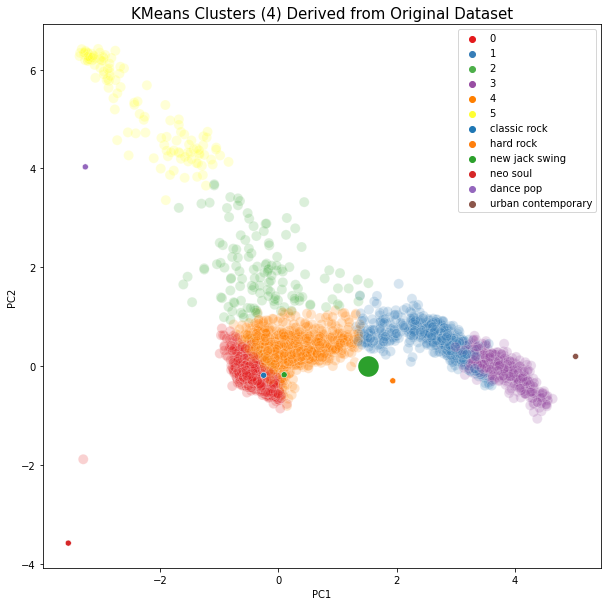

In [82]:
pca2 = PCA(n_components=3).fit(X_train)
pca2d = pca2.transform(X_train)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)
sns.scatterplot(x1, y1,hue=label)
sns.scatterplot(x2, y2,s=500)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [ ]:
#each color denotes  each sub gener  

In [ ]:
#big green point is new song center point 

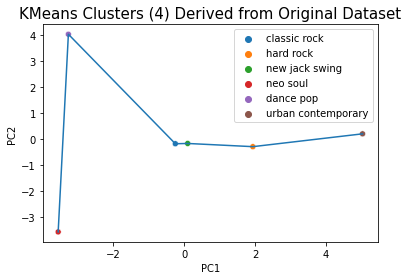

In [83]:
#plt.figure(figsize = (10,10))
sns.scatterplot(x1, y1,hue=label).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)

sns.lineplot(x=x1, y=y1)
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])


plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [ ]:
#all 6 cluster centers are as fallows

In [84]:
cluster_centers=[[-2.17267059, -0.00691348,  0.37222346],
       [ 2.23602704,  0.49275542,  0.01852809],
       [-1.85225801, -0.20164277, -0.16579468],
       [-2.15024764, -0.17338795, -0.09134887],
       [-0.64843033,  0.2587469 , -0.16743853],
       [ 4.58757954, -0.36955813,  0.03383053]]

In [ ]:
#distance between consecative centroids

In [85]:
for t in range(len(cluster_centers)-1):
    
    #print(cluster_centers[t])
    
    distance = np.sqrt(np.sum(np.array(cluster_centers[t]) -np.array(cluster_centers[t+1]))**2)
    print(distance)
    

4.554671160000001
4.9670060099999995
0.195289
1.8578624999999998
4.8089739


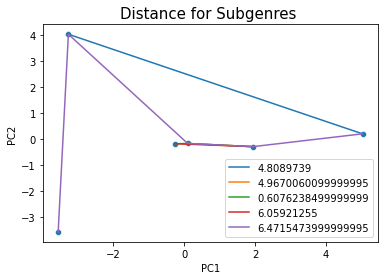

In [86]:
#plt.figure(figsize = (10,10))
sns.scatterplot(x1, y1).set_title('Distance for Subgenres ', fontsize=15)

distance_4_6 = np.sqrt(np.sum(np.array(cluster_centers[4]) -np.array(cluster_centers[5]))**2)
sns.lineplot(x=x1[4:6], y=y1[4:6],legend='brief', label=str(distance_4_6))

distance_1_2 = np.sqrt(np.sum(np.array(cluster_centers[1]) -np.array(cluster_centers[2]))**2)
sns.lineplot(x=x1[1:3], y=y1[1:3],legend='brief', label=str(distance_1_2))

distance_0_3 = np.sqrt(np.sum(np.array(cluster_centers[3]) -np.array(cluster_centers[0]))**2)
sns.lineplot(x=x1[0:3], y=y1[0:3],legend='brief', label=str(distance_0_3))

distance_0_2 = np.sqrt(np.sum(np.array(cluster_centers[0]) -np.array(cluster_centers[5]))**2)
sns.lineplot(x=x1[0:2], y=y1[0:2],legend='brief', label=str(distance_0_2))

distance_1_6 = np.sqrt(np.sum(np.array(cluster_centers[2]) -np.array(cluster_centers[5]))**2)
sns.lineplot(x=x1[1:6], y=y1[1:6],legend='brief', label=str(distance_1_6))

#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])


plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [87]:

pca23 = PCA(n_components=3).fit(X_train)
pca23d = pca23.transform(X_train)


pca2d1 = pca23d

first_list = [row[0] for row in pca2d1]
second_list = [row[1] for row in pca2d1]
third_list = [row[2] for row in pca2d1]

print("First List:", first_list)
print("Second List:", second_list)
print("Third List:", third_list)


# In[101]:


len(first_list)


# In[102]:


len(labels)


# In[103]:


data = {'feature1': first_list, 'feature2': second_list, 'feature3':third_list, 'label': labels}
df3 = pd.DataFrame(data)


# In[104]:


df3["label"].unique()


# In[118]:


df00 = df3[df3['label'] == 0]
df11 = df3[df3['label'] == 1]
df22 = df3[df3['label'] == 2]
df33 = df3[df3['label'] == 3]
df44 = df3[df3['label'] == 4]
df55 = df3[df3['label'] == 5]


# In[119]:


print(df11["feature1"].mean())


# In[120]:


list_of_avg_cols_df1 = df00.mean().tolist()
list_of_avg_cols_df2 = df11.mean().tolist()
list_of_avg_cols_df3 = df22.mean().tolist()
list_of_avg_cols_df4 = df33.mean().tolist()
list_of_avg_cols_df5 = df44.mean().tolist()
list_of_avg_cols_df6 = df55.mean().tolist()


# In[121]:


list_of_avg_cols_df1[0:3]


# In[122]:


averaged_cluster=[list_of_avg_cols_df1[0:3],
       list_of_avg_cols_df2[0:3],
       list_of_avg_cols_df3[0:3],
       list_of_avg_cols_df4[0:3],
       list_of_avg_cols_df5[0:3],
       list_of_avg_cols_df6[0:3]]


# In[123]:


list_of_avg_cols_df6[0:3]


# In[124]:


averaged_cluster


# In[125]:


for t in range(len(averaged_cluster)-1):
    
    #print(cluster_centers[t])
    
    distance = np.sqrt(np.sum(np.array(averaged_cluster[t]) -np.array(averaged_cluster[t+1]))**2)
    print(distance)
    


# In[ ]:





# In[138]:


x1=[averaged_cluster[0][0],averaged_cluster[1][0],averaged_cluster[2][0],averaged_cluster[3][0],averaged_cluster[4][0],averaged_cluster[5][0]]


# In[139]:


y1=[averaged_cluster[0][1],averaged_cluster[1][1],averaged_cluster[2][1],averaged_cluster[3][1],averaged_cluster[4][1],averaged_cluster[5][1]]



# In[ ]:





# In[ ]:





# In[ ]:




First List: [1.0425081518459798, -0.46308381132103293, -0.5165003407119784, -0.6920395124740868, -0.4713231132324426, -0.3197335119394899, -0.40038542027034757, -0.3709857475277224, -0.4673449820495327, -0.3435351303247476, -0.1128765294085186, -0.3903133002641611, -0.4142530026443445, 0.12557000273236757, -0.6394303163388375, -0.12676865595901127, -0.6263301559418852, -0.537965164909258, -0.07021144793831514, 3.446805906760659, 2.8067025149162954, -0.5781229688184253, -0.3019649141713245, 0.718050945673774, -0.4186512835546795, -0.5675590609150283, -0.6262662905363388, -0.01836472728382699, -0.2754675515166738, -0.5486395667126427, 0.02492072945338752, -0.47896345613174107, -0.6443851976091878, -0.3402843667055237, -0.26970732505427275, -0.4747618476904931, -0.3639330189339707, -0.46871974831547936, -0.2456804303158761, -0.29927871041649423, -0.35684605749181125, -0.5239905207755093, -0.5596618618904396, -0.48450155467967126, -0.3113984363138521, -0.23633491664730522, 0.96426253984321

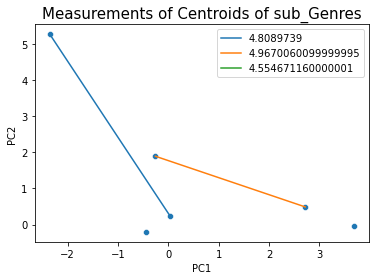

In [88]:

# In[137]:


#plt.figure(figsize = (10,10))
sns.scatterplot(x1, y1).set_title('Measurements of Centroids of sub_Genres', fontsize=15)
distance_4_6 = np.sqrt(np.sum(np.array(cluster_centers[4]) -np.array(cluster_centers[5]))**2)
sns.lineplot(x=x1[4:6], y=y1[4:6],legend='brief', label=str(distance_4_6))

distance_1_2 = np.sqrt(np.sum(np.array(cluster_centers[1]) -np.array(cluster_centers[2]))**2)
sns.lineplot(x=x1[1:3], y=y1[1:3],legend='brief', label=str(distance_1_2))

distance_0_1 = np.sqrt(np.sum(np.array(cluster_centers[1]) -np.array(cluster_centers[0]))**2)
sns.lineplot(x=x1[0:1], y=y1[0:1],legend='brief', label=str(distance_0_1))

#distance_4_6 = np.sqrt(np.sum(np.array(cluster_centers[4]) -np.array(cluster_centers[5]))**2)
#sns.lineplot(x=x1[4:6], y=y1[4:6],legend='brief', label=str(distance_4_6))

#distance_4_6 = np.sqrt(np.sum(np.array(cluster_centers[4]) -np.array(cluster_centers[5]))**2)
#sns.lineplot(x=x1[4:6], y=y1[4:6],legend='brief', label=str(distance_4_6))
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])
#sns.lineplot(x=x1[0], y=y1[0])


plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()
